Zadanie 1.

In [ ]:
#a)
import pandas as pd
df = pd.read_csv("weather_Portland.csv")
print(df.head())

         Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2009-01-01  Portland     12.5     16.6       0.0          4.8       6.5   
1  2009-01-02  Portland      8.6     15.2       1.6          4.8      11.7   
2  2009-01-03  Portland      1.6     18.0       0.2          4.6      11.9   
3  2009-01-04  Portland      4.8     20.1       0.0          4.8      13.8   
4  2009-01-05  Portland      4.4     18.8       0.0          5.6      13.6   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          SW           59.0         SW  ...        99.0       1006.7   
1         SSW           39.0         SW  ...        61.0       1020.0   
2           S           30.0         NE  ...        52.0       1020.4   
3           S           28.0          E  ...        63.0       1016.4   
4           W           46.0          W  ...        68.0       1014.0   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1010.5  

In [ ]:
#b)
df = df.drop(columns=["Date", "Location", "Evaporation", "Sunshine", "RainToday", "RISK_MM"])

print(df.head())

   MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0     12.5     16.6       0.0          SW           59.0         SW   
1      8.6     15.2       1.6         SSW           39.0         SW   
2      1.6     18.0       0.2           S           30.0         NE   
3      4.8     20.1       0.0           S           28.0          E   
4      4.4     18.8       0.0           W           46.0          W   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0         SW          28.0          28.0         97.0         99.0   
1          S          20.0          17.0         60.0         61.0   
2        ESE           9.0          15.0         67.0         52.0   
3          S          11.0          17.0         73.0         63.0   
4          W          20.0          31.0         72.0         68.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainTomorrow  
0       1006.7       1010.5       NaN       6.0     13.7     14.5      

In [ ]:
#c)
df = df[df["RainTomorrow"].notna()]
print(df["RainTomorrow"].isnull().sum())

0


In [ ]:
#d)
df = df[df.isnull().sum(axis=1) <= 2]
print((df.isnull().sum(axis=1) > 2).sum())

0


Zadanie 2.

In [ ]:
#a)
from sklearn.impute import SimpleImputer

numertyczne = ["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm",
            "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "WindSpeed9am", "WindSpeed3pm",'Cloud9am','Cloud3pm']
kategoryczne = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainTomorrow"]

num_imputer = SimpleImputer(strategy="median")
df[numertyczne] = num_imputer.fit_transform(df[numertyczne])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[kategoryczne] = cat_imputer.fit_transform(df[kategoryczne])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4790 entries, 0 to 4896
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        4790 non-null   float64
 1   MaxTemp        4790 non-null   float64
 2   Rainfall       4790 non-null   float64
 3   WindGustDir    4790 non-null   object 
 4   WindGustSpeed  4790 non-null   float64
 5   WindDir9am     4790 non-null   object 
 6   WindDir3pm     4790 non-null   object 
 7   WindSpeed9am   4790 non-null   float64
 8   WindSpeed3pm   4790 non-null   float64
 9   Humidity9am    4790 non-null   float64
 10  Humidity3pm    4790 non-null   float64
 11  Pressure9am    4790 non-null   float64
 12  Pressure3pm    4790 non-null   float64
 13  Cloud9am       4790 non-null   float64
 14  Cloud3pm       4790 non-null   float64
 15  Temp9am        4790 non-null   float64
 16  Temp3pm        4790 non-null   float64
 17  RainTomorrow   4790 non-null   object 
dtypes: float64(14

In [ ]:
#b)
def kategorie(p):
    if p <= 980:
        return "bardzo_niskie"
    elif p <= 1000:
        return "niskie"
    elif p <= 1020:
        return "normalne"
    elif p <= 1040:
        return "wysokie"
    else:
        return "bardzo_wysokie"

df["Pressure9am"] = df["Pressure9am"].apply(kategorie)
df["Pressure3pm"] = df["Pressure3pm"].apply(kategorie)

print(df["Pressure3pm"].head())

0    normalne
1     wysokie
2    normalne
3    normalne
4    normalne
Name: Pressure3pm, dtype: object


Zadanie 3.

In [ ]:
#a)
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4790 entries, 0 to 4896
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        4790 non-null   float64
 1   MaxTemp        4790 non-null   float64
 2   Rainfall       4790 non-null   float64
 3   WindGustDir    4790 non-null   object 
 4   WindGustSpeed  4790 non-null   float64
 5   WindDir9am     4790 non-null   object 
 6   WindDir3pm     4790 non-null   object 
 7   WindSpeed9am   4790 non-null   float64
 8   WindSpeed3pm   4790 non-null   float64
 9   Humidity9am    4790 non-null   float64
 10  Humidity3pm    4790 non-null   float64
 11  Pressure9am    4790 non-null   object 
 12  Pressure3pm    4790 non-null   object 
 13  Cloud9am       4790 non-null   float64
 14  Cloud3pm       4790 non-null   float64
 15  Temp9am        4790 non-null   float64
 16  Temp3pm        4790 non-null   float64
dtypes: float64(12), object(5)
memory usage: 673.6+ KB
None


In [ ]:
#b)
import numpy as np

numeryczne = ["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "Humidity9am", "Humidity3pm", "Temp9am", "Temp3pm", "WindSpeed9am", "WindSpeed3pm",'Cloud9am','Cloud3pm']

for col in numeryczne:
    mu = X[col].mean()
    sigma = X[col].std()
    upper = mu + 3 * sigma
    lower = mu - 3 * sigma
    X[col] = np.clip(X[col], lower, upper)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4790 entries, 0 to 4896
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        4790 non-null   float64
 1   MaxTemp        4790 non-null   float64
 2   Rainfall       4790 non-null   float64
 3   WindGustDir    4790 non-null   object 
 4   WindGustSpeed  4790 non-null   float64
 5   WindDir9am     4790 non-null   object 
 6   WindDir3pm     4790 non-null   object 
 7   WindSpeed9am   4790 non-null   float64
 8   WindSpeed3pm   4790 non-null   float64
 9   Humidity9am    4790 non-null   float64
 10  Humidity3pm    4790 non-null   float64
 11  Pressure9am    4790 non-null   object 
 12  Pressure3pm    4790 non-null   object 
 13  Cloud9am       4790 non-null   float64
 14  Cloud3pm       4790 non-null   float64
 15  Temp9am        4790 non-null   float64
 16  Temp3pm        4790 non-null   float64
dtypes: float64(12), object(5)
memory usage: 673.6+ KB
None


Zadanie 4.

<ipython-input-11-0afa3ca56295>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


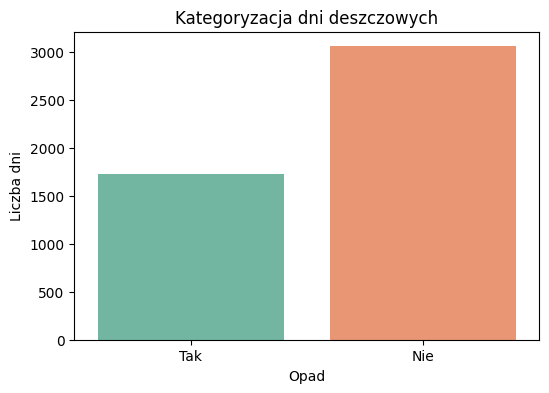

In [ ]:
#a)
import seaborn as sns
import matplotlib.pyplot as plt

y = y.replace({"Yes": "Tak", "No": "Nie"})

count_values = y.value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
#b)
plt.xlabel('Opad')
plt.ylabel('Liczba dni')
#c)
plt.title('Kategoryzacja dni deszczowych')
#d)
plt.show()

Zadanie 5.

In [ ]:
#a)
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["bardzo_niskie", "niskie", "normalne", "wysokie", "bardzo_wysokie"]] * X[['Pressure9am', 'Pressure3pm']].shape[1])

X[['Pressure9am', 'Pressure3pm']] = encoder.fit_transform(X[['Pressure9am', 'Pressure3pm']])

In [ ]:
print("X:", X.shape)
print("y:", y.shape)

X: (4790, 17)
y: (4790,)


In [ ]:
#b
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

X_nominal = X[['WindGustDir', 'WindDir9am', 'WindDir3pm']]

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(X_nominal)

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['WindGustDir', 'WindDir9am', 'WindDir3pm']))
#print(encoded_df.shape)
X.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
X_final = pd.concat([X, encoded_df], axis=1)
#print(X_final.shape)
#print(X_final.isnull().sum())
X_final = X_final.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
print(X_final.info())
print(X_final.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          4790 non-null   float64
 1   MaxTemp          4790 non-null   float64
 2   Rainfall         4790 non-null   float64
 3   WindGustSpeed    4790 non-null   float64
 4   WindSpeed9am     4790 non-null   float64
 5   WindSpeed3pm     4790 non-null   float64
 6   Humidity9am      4790 non-null   float64
 7   Humidity3pm      4790 non-null   float64
 8   Pressure9am      4790 non-null   float64
 9   Pressure3pm      4790 non-null   float64
 10  Cloud9am         4790 non-null   float64
 11  Cloud3pm         4790 non-null   float64
 12  Temp9am          4790 non-null   float64
 13  Temp3pm          4790 non-null   float64
 14  WindGustDir_ENE  4790 non-null   float64
 15  WindGustDir_ESE  4790 non-null   float64
 16  WindGustDir_N    4790 non-null   float64
 17  WindGustDir_NE

In [ ]:
#c)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

y = y_encoded

print(y[:10])

[1 0 0 0 0 0 0 0 0 0]


Zadanie 6.

In [ ]:
#a)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#b)
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Pipeline
pipelines = {
    "KNN": Pipeline([
        ("classifier", KNeighborsClassifier())
    ]),

    "DrzewoDecyzyjne": Pipeline([
        ("classifier", DecisionTreeClassifier(max_depth=4))
    ]),

    "RegresjaLogistyczna": Pipeline([
        ("classifier", LogisticRegression(penalty = None, max_iter=2000))
    ]),

    "SVM_Linear": Pipeline([
        ("classifier", SVC(kernel='linear', C=1e3))
    ]),

    "SVM_RBF": Pipeline([
        ("classifier", SVC(kernel='rbf'))
    ])
}

In [ ]:
missing_train = X_train.isnull().sum()
print("Braki danych w X_train:")
print(missing_train[missing_train > 0])

# Sprawdzenie, czy w X_test są nulle
missing_test = X_test.isnull().sum()
print("\nBraki danych w X_test:")
print(missing_test[missing_test > 0])

print(f"\nLiczba wszystkich braków w X_train: {X_train.isnull().sum().sum()}")
print(f"Liczba wszystkich braków w X_test: {X_test.isnull().sum().sum()}")

Braki danych w X_train:
Series([], dtype: int64)

Braki danych w X_test:
Series([], dtype: int64)

Liczba wszystkich braków w X_train: 0
Liczba wszystkich braków w X_test: 0


In [ ]:
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#c)
y_train_preds = {}
y_test_preds = {}

for name, pipeline in pipelines.items():
    y_train_preds[name] = pipeline.predict(X_train)

    y_test_preds[name] = pipeline.predict(X_test)

Zadanie 7.

In [ ]:
#a)
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Zbior treningowym:")
for name in y_train_preds:
    acc = accuracy_score(y_train, y_train_preds[name])
    prec = precision_score(y_train, y_train_preds[name], pos_label=1)
    rec = recall_score(y_train, y_train_preds[name], pos_label=1)

    print(f"{name}: accuracy={acc:.3f}, precision={prec:.3f}, recall={rec:.3f}")

print("\nZbior testowym:")
for name in y_test_preds:
    acc = accuracy_score(y_test, y_test_preds[name])
    prec = precision_score(y_test, y_test_preds[name], pos_label=1)
    rec = recall_score(y_test, y_test_preds[name], pos_label=1)

    print(f"{name}: accuracy={acc:.3f}, precision={prec:.3f}, recall={rec:.3f}")

Zbior treningowym:
KNN: accuracy=0.835, precision=0.798, recall=0.729
DrzewoDecyzyjne: accuracy=0.794, precision=0.787, recall=0.590
RegresjaLogistyczna: accuracy=0.805, precision=0.761, recall=0.671
SVM_Linear: accuracy=0.797, precision=0.720, recall=0.718
SVM_RBF: accuracy=0.797, precision=0.778, recall=0.613

Zbior testowym:
KNN: accuracy=0.747, precision=0.668, recall=0.598
DrzewoDecyzyjne: accuracy=0.766, precision=0.748, recall=0.532
RegresjaLogistyczna: accuracy=0.772, precision=0.724, recall=0.598
SVM_Linear: accuracy=0.763, precision=0.674, recall=0.665
SVM_RBF: accuracy=0.775, precision=0.752, recall=0.561


In [ ]:
#b)
metryki = {}

for name in y_train_preds:
    metryki[name] = {
        'acc_train': accuracy_score(y_train, y_train_preds[name]),
        'acc_test': accuracy_score(y_test, y_test_preds[name]),
        'prc_train': precision_score(y_train, y_train_preds[name], pos_label=1),
        'prc_test': precision_score(y_test, y_test_preds[name], pos_label=1),
        'rcl_train': recall_score(y_train, y_train_preds[name], pos_label=1),
        'rcl_test': recall_score(y_test, y_test_preds[name], pos_label=1)
    }

metryki_df = pd.DataFrame.from_dict(metryki, orient='index')

print(metryki_df)

                     acc_train  acc_test  prc_train  prc_test  rcl_train  \
KNN                   0.835334  0.747390   0.798419  0.667742   0.728716   
DrzewoDecyzyjne       0.793841  0.766180   0.786538  0.747967   0.590188   
RegresjaLogistyczna   0.804802  0.772443   0.761047  0.723776   0.670996   
SVM_Linear            0.797234  0.763048   0.720492  0.674487   0.717893   
SVM_RBF               0.796712  0.774530   0.777676  0.751938   0.613276   

                     rcl_test  
KNN                  0.598266  
DrzewoDecyzyjne      0.531792  
RegresjaLogistyczna  0.598266  
SVM_Linear           0.664740  
SVM_RBF              0.560694  


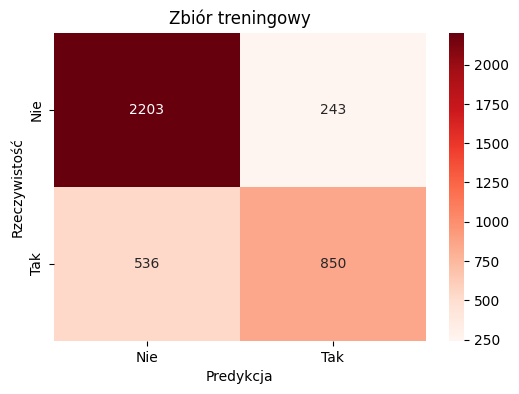

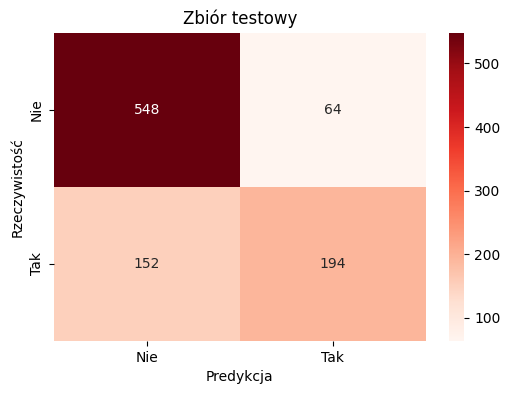

In [ ]:
#c)
from sklearn.metrics import confusion_matrix

best_model = 'SVM_RBF'
y_train_pred_best = y_train_preds[best_model]
y_test_pred_best = y_test_preds[best_model]

cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)

def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predykcja')
    plt.ylabel('Rzeczywistość')
    plt.show()

labels = ['Nie', 'Tak']

plot_confusion_matrix(cm_train, "Zbiór treningowy", labels)
plot_confusion_matrix(cm_test, "Zbiór testowy", labels)

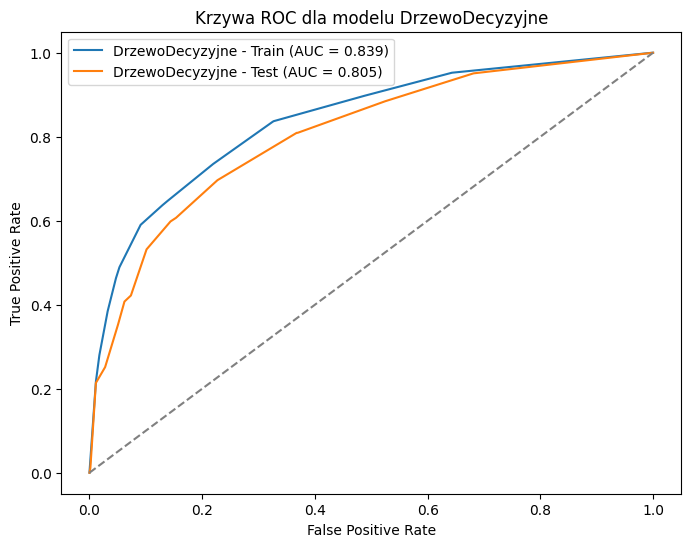

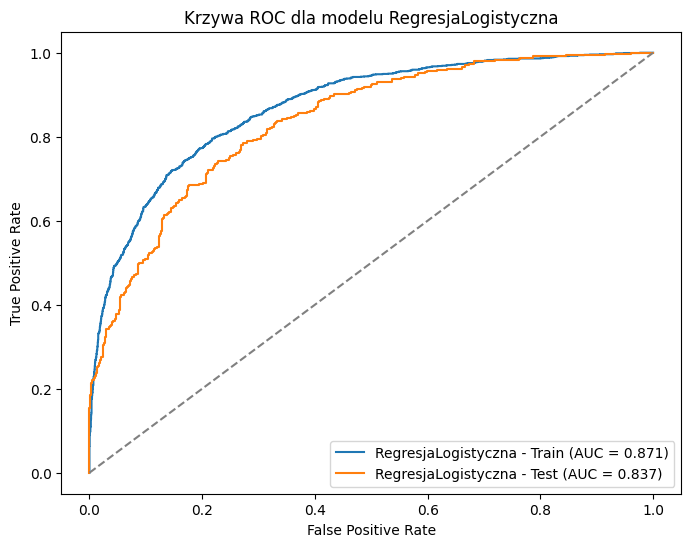

Wartości AUC:
DrzewoDecyzyjne_train: 0.839
DrzewoDecyzyjne_test: 0.805
RegresjaLogistyczna_train: 0.871
RegresjaLogistyczna_test: 0.837


In [ ]:
#d)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models = ['DrzewoDecyzyjne', 'RegresjaLogistyczna']

auc_scores = {}

for model_name in models:
    y_train_prob = pipelines[model_name].predict_proba(X_train)[:, 1]
    y_test_prob = pipelines[model_name].predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    auc_train = roc_auc_score(y_train, y_train_prob)
    auc_scores[model_name + '_train'] = auc_train

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    auc_test = roc_auc_score(y_test, y_test_prob)
    auc_scores[model_name + '_test'] = auc_test

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'{model_name} - Train (AUC = {auc_train:.3f})')
    plt.plot(fpr_test, tpr_test, label=f'{model_name} - Test (AUC = {auc_test:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Krzywa ROC dla modelu {model_name}')
    plt.legend()
    plt.show()

print("Wartości AUC:")
for model, auc in auc_scores.items():
    print(f"{model}: {auc:.3f}")